## Nonlinear Regression using Basis Functions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sn
sn.set(style='whitegrid')

### Polynomial Regression

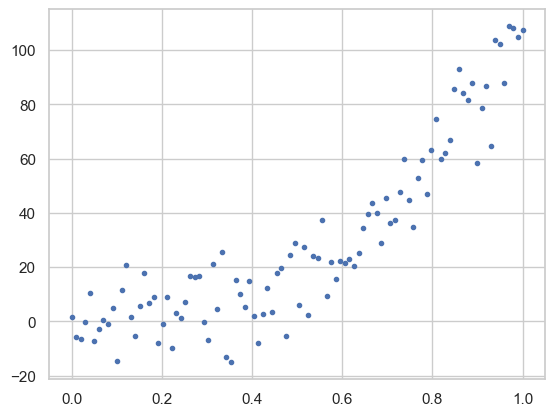

In [2]:
X = np.linspace(0, 1, 100).reshape(100,1) 
Y_clean = 1 + 2*X+10*X**2+100*X**3
Y = Y_clean + 10*np.random.randn(*Y_clean.shape)
plt.plot(X, Y,'.')

Text(0, 0.5, 'Y')

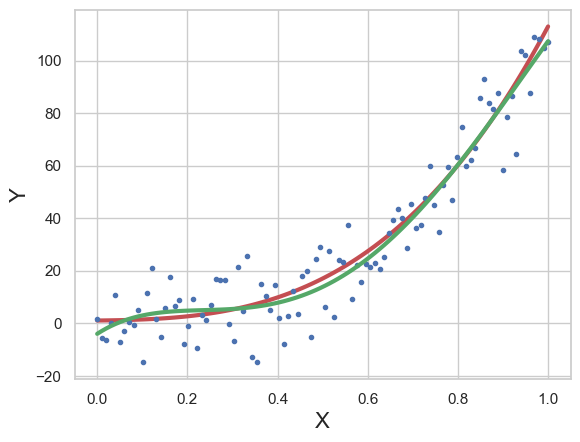

In [3]:
poly = PolynomialFeatures(degree=5)
X_ = poly.fit_transform(X)
#
LM = LinearRegression()
LM.fit(X_, Y)
Y_pred = LM.predict(X_)
#
fig, ax = plt.subplots()
ax.plot(X, Y_clean,'-r', linewidth=3)
ax.plot(X, Y,'.')
ax.plot(X, Y_pred,'-g', linewidth=3)
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)

We can use make_pipeline to combine PolynomialFeatures and LinearRegression together

Text(0, 0.5, 'Y')

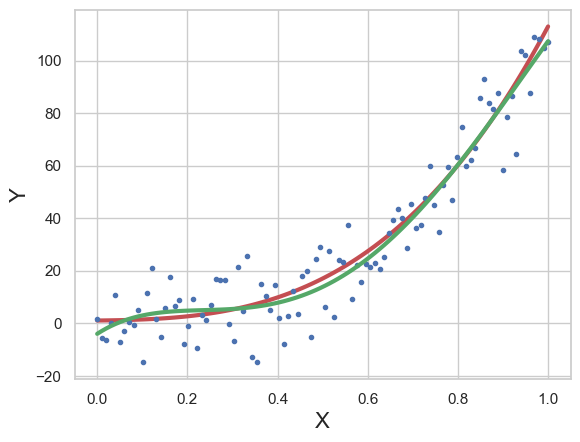

In [4]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=5),
                           LinearRegression())
#
poly_model.fit(X, Y)
Y_pred = poly_model.predict(X)
#
fig, ax = plt.subplots()
ax.plot(X, Y_clean,'-r', linewidth=3)
ax.plot(X, Y,'.')
ax.plot(X, Y_pred,'-g', linewidth=3)
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)

fit a polynomial of degree 7 to data points generated from a sine function

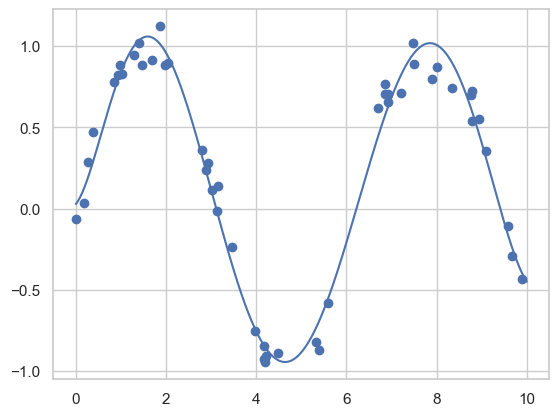

In [5]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())                          
poly_model.fit(x.reshape(-1,1), y)
x_test = np.linspace(0, 10, 1000)
y_test = poly_model.predict(x_test.reshape(-1,1))
plt.scatter(x, y)
plt.plot(x_test, y_test);

### Regression using Gaussian Basis Functions

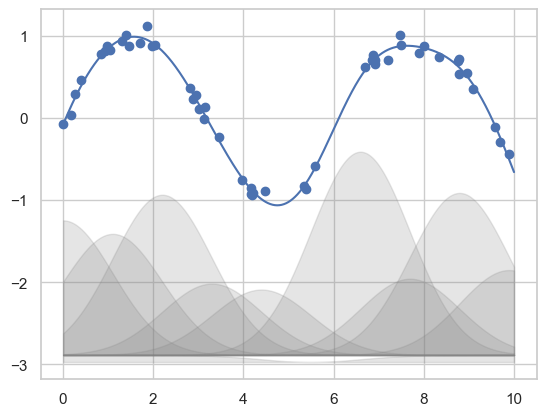

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly-spaced Gaussian Features for 1D input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

gauss_model = make_pipeline(GaussianFeatures(10, 1.0),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)

gf = gauss_model.named_steps['gaussianfeatures']
lm = gauss_model.named_steps['linearregression']

fig, ax = plt.subplots()

for i in range(10):
    selector = np.zeros(10)
    selector[i] = 1
    Xfit = gf.transform(xfit[:, None]) * selector
    yfit = lm.predict(Xfit)
    ax.fill_between(xfit, yfit.min(), yfit, color='gray', alpha=0.2)

yfit = gauss_model.predict(xfit[:, np.newaxis])
ax.scatter(x, y)
ax.plot(xfit, yfit)